In [1]:
import os
import sys

import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import pandas as pd
import seaborn as sns
import json
from natsort import natsorted

# Simple plot

See below for a better one!

<Axes: ylabel='Unnamed: 0'>

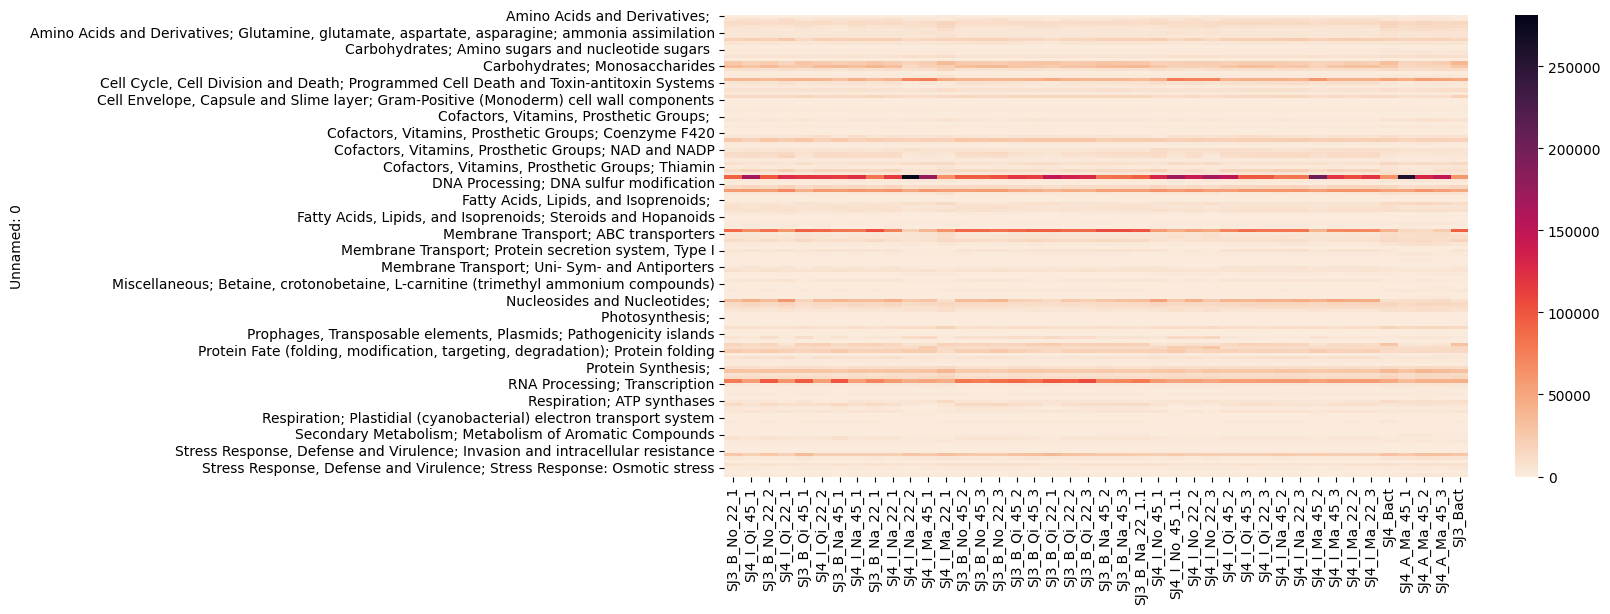

In [2]:
df = pd.read_csv(f"sarah/level2_norm_ss_renamed.tsv", delimiter="\t")
df = df.set_index("Unnamed: 0")
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(data=df, ax=ax, cmap="rocket_r")

# Sort the columns based on their names

In [102]:
df2 = df.rename(columns={'SJ3_Bact': ' SJ3_Bact', 'SJ4_Bact': ' SJ4_Bact'})

dfs = df2.reindex(natsorted(df2.columns), axis=1)
dfs.head(3)

,SJ3_Bact,SJ4_Bact,SJ3_B_Na_22_1,SJ3_B_Na_22_1.1,SJ3_B_Na_45_1,SJ3_B_Na_45_2,SJ3_B_Na_45_3,SJ3_B_No_22_1,SJ3_B_No_22_2,SJ3_B_No_22_3,...,SJ4_I_No_22_2,SJ4_I_No_22_3,SJ4_I_No_45_1,SJ4_I_No_45_1.1,SJ4_I_Qi_22_1,SJ4_I_Qi_22_2,SJ4_I_Qi_22_3,SJ4_I_Qi_45_1,SJ4_I_Qi_45_2,SJ4_I_Qi_45_3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Amino Acids and Derivatives;,1075.399163,1317.587717,537.312922,532.456165,380.479859,598.367964,516.810113,560.164582,490.329454,449.012172,...,846.532270,1214.149527,748.102684,1104.821339,520.912506,533.002819,723.528728,608.414237,646.070688,713.212839
"Amino Acids and Derivatives; Alanine, serine, and glycine",2823.628278,3538.684330,6762.094703,6864.265989,7581.465451,6213.097985,6639.227467,6214.702579,6498.007605,7814.282065,...,8289.866224,5030.984407,9105.178661,5391.008520,10601.990022,7300.644478,8690.238246,7913.913638,7838.892734,8013.985941
"Amino Acids and Derivatives; Arginine; urea cycle, creatine, polyamines",15257.802835,17596.675975,11336.371759,10780.786809,9738.720764,11408.354952,11062.908582,11299.687761,10713.786434,10280.173342,...,10680.083853,11381.164094,12383.961485,10826.738027,11625.645872,12813.694687,13285.242573,11998.207000,12364.805207,13314.954545


# Make a plot

We offset the labels for the major subsystem categories, and then alternate the minor labels. We also rotate the x-axis labels to 30 degrees

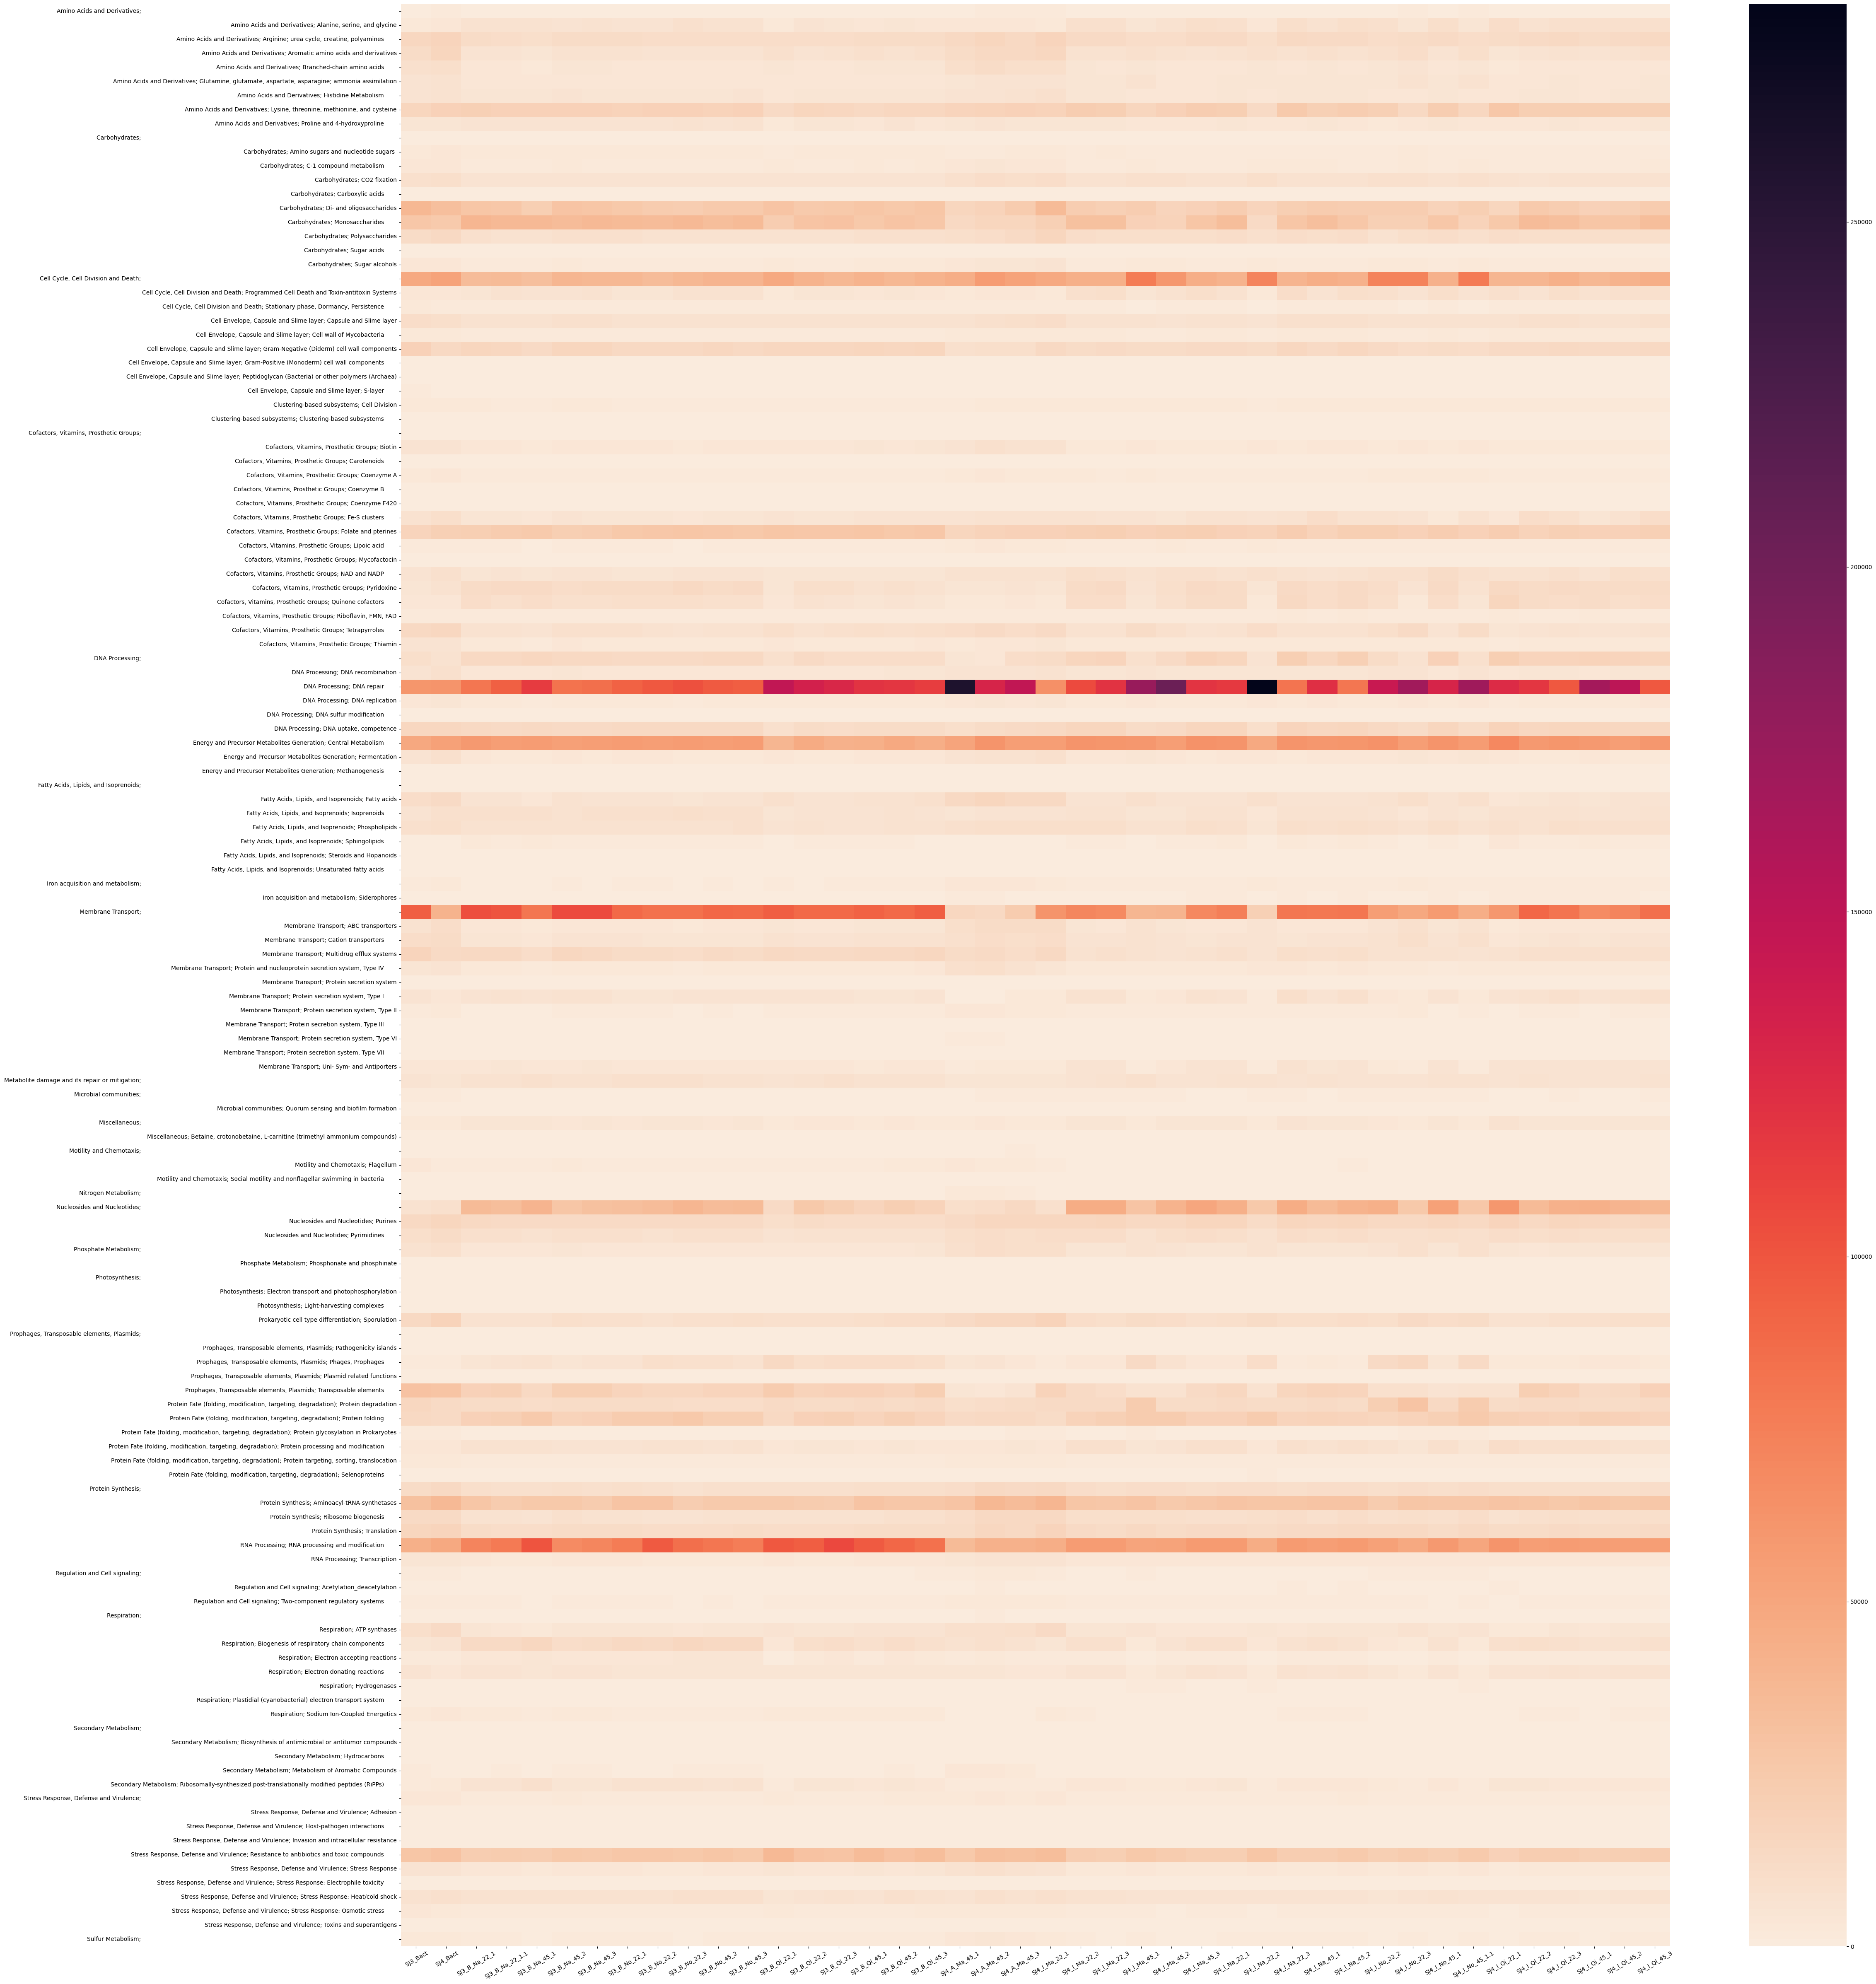

In [103]:
fig, ax = plt.subplots(figsize=(48, 48))
bx = sns.heatmap(data=dfs, ax=ax, cmap="rocket_r")
#ax.set_xticks(np.arange(df.shape[1]))
ax.set_xticklabels(bx.get_xticklabels(), rotation=30)
yticklabels = bx.get_yticklabels()
# [yticklabels[i].set_position([-0.01, yticklabels[i].get_position()[1]]) if i % 2 == 0 else True for i in range(len(yticklabels))]
offset = False
for i in range(len(yticklabels)):
    if yticklabels[i].get_text().endswith("; "):
        yticklabels[i].set_position([-0.2, yticklabels[i].get_position()[1]])
        offset = False
        continue
    if offset == 0:
        offset = True
    else:
        offset = False
        yticklabels[i].set_position([-0.01, yticklabels[i].get_position()[1]])
        
bx.set_yticklabels(yticklabels)
ax.set_ylabel("")
plt.tight_layout()
fig.savefig(f"sarah/level2.png")